In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from statsmodels.api import add_constant, OLS

In [104]:
df = pd.read_csv('data/daily_data.csv')
df_ol = df[df['location'] == 'Olsztyn']
df_ol.head()

,location,date,weathercode,temperature_max,temperature_min,rain_sum,snowfall_sum,windspeed_max,winddirection_dominant
0,Olsztyn,2022-10-01,53,14.8,7.2,3.4,0.0,17.7,268
1,Olsztyn,2022-10-02,61,13.2,9.4,4.5,0.0,22.4,188
2,Olsztyn,2022-10-03,53,12.3,8.9,1.6,0.0,31.6,133
3,Olsztyn,2022-10-04,51,13.5,8.8,0.8,0.0,26.3,146
4,Olsztyn,2022-10-05,3,15.7,9.2,0.0,0.0,20.2,226


In [105]:
x = df_ol['temperature_min']
y = df_ol['temperature_max']
result = linregress(x, y)
result

LinregressResult(slope=1.1114001976586496, intercept=3.885048146205525, rvalue=0.9534126572662663, pvalue=6.745844609385518e-55, stderr=0.034819332330958984, intercept_stderr=0.21422842765332925)

Wykres prostej regresji liniowej z jedną zmienną objaśniającą, próbującej przewidzieć maksymalną temperaturę danego dnia na podstawie minimalnej temperatury tego dnia. Dla przykładu: dla minimalnej temperatury wynoszącej 0 stopni, przewidziana została maksymalna temperatura około 3.89 stopnia

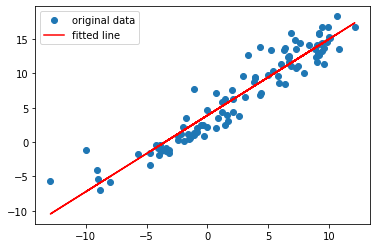

In [106]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, result.intercept + result.slope * x, 'r', label='fitted line')
plt.legend()
plt.show()

In [107]:
result.intercept + result.slope * 13.2

18.5555307552997

Dla minimalnej temperatury wynoszącej 13.2 stopnia, przewidziana została maksymalna temperatura około 18.56 stopnia

In [108]:
X = df_ol[['date', 'weathercode', 'temperature_min', 'rain_sum', 'snowfall_sum', 'windspeed_max', 'winddirection_dominant']]
X.set_index('date', inplace=True)
X = add_constant(X)
Y = df_ol[['date', 'temperature_max']]
Y.set_index('date', inplace=True)
X.head()

,const,weathercode,temperature_min,rain_sum,snowfall_sum,windspeed_max,winddirection_dominant
date,,,,,,,
2022-10-01,1.0,53,7.2,3.4,0.0,17.7,268
2022-10-02,1.0,61,9.4,4.5,0.0,22.4,188
2022-10-03,1.0,53,8.9,1.6,0.0,31.6,133
2022-10-04,1.0,51,8.8,0.8,0.0,26.3,146
2022-10-05,1.0,3,9.2,0.0,0.0,20.2,226


In [110]:
Y.head()

,temperature_max
date,
2022-10-01,14.8
2022-10-02,13.2
2022-10-03,12.3
2022-10-04,13.5
2022-10-05,15.7


In [111]:
model = OLS(Y, X).fit()
prediction = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temperature_max   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     191.5
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.81e-51
Time:                        15:36:38   Log-Likelihood:                -209.77
No. Observations:                 104   AIC:                             433.5
Df Residuals:                      97   BIC:                             452.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.7069      0.913      1.869      0.065      -0.106       3.520
weathercode               -0.0118      0.009     -1.352      0.180      -0.029       0.006
temperature_min            1.0701      0.036     29.506      0.000       0.998       1.142
rain_sum                  -0.0270      0.128     -0.211      0.833      -0.281       0.227
snowfall_sum              -0.5263      0.321     -1.637      0.105      -1.164       0.112
windspeed_max              0.1300      0.038      3.408      0.001       0.054       0.206
winddirection_dominant     0.0023      0.002      0.946      0.346      -0.002       0.007
==============================================================================
Omnibus:                        5.031   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.966
Skew:                           0.534   Prob(JB):                       0.0835
Kurtosis:                       2.913   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
prediction

date
2022-10-01    11.604666
2022-10-02    14.265315
2022-10-03    14.974642
2022-10-04    14.252906
2022-10-05    14.654862
                ...    
2023-01-08     6.919122
2023-01-09     5.491291
2023-01-10     4.728031
2023-01-11     5.508210
2023-01-12     8.203084
Length: 104, dtype: float64

Zestawienie faktycznej maksymalnej temperatury danego dnia z wartością przewidzianą

In [113]:
pred_results = Y.copy()
pred_results['predicted value'] = prediction
pred_results

,temperature_max,predicted value
date,,
2022-10-01,14.8,11.604666
2022-10-02,13.2,14.265315
2022-10-03,12.3,14.974642
2022-10-04,13.5,14.252906
2022-10-05,15.7,14.654862
...,...,...
2023-01-08,3.1,6.919122
2023-01-09,3.9,5.491291
2023-01-10,4.3,4.728031


### Przewidywanie przyszłej temperatury

In [114]:
df2 = df_ol.copy()
df2 = df2[['date', 'temperature_min']]
df2

,date,temperature_min
0,2022-10-01,7.2
1,2022-10-02,9.4
2,2022-10-03,8.9
3,2022-10-04,8.8
4,2022-10-05,9.2
...,...,...
99,2023-01-08,1.7
100,2023-01-09,1.6
101,2023-01-10,1.2
102,2023-01-11,0.9


In [115]:
x = df2['date']
y = df2['temperature_min']
x.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             94,  95,  96,  97,  98,  99, 100, 101, 102, 103],
           dtype='int64', length=104)

In [116]:
result = linregress(x.index, y)
result

LinregressResult(slope=-0.11592393043849357, intercept=8.53835164835165, rvalue=-0.6224640232234294, pvalue=1.7373732076680292e-12, stderr=0.014431964960087057, intercept_stderr=0.8603073348558196)

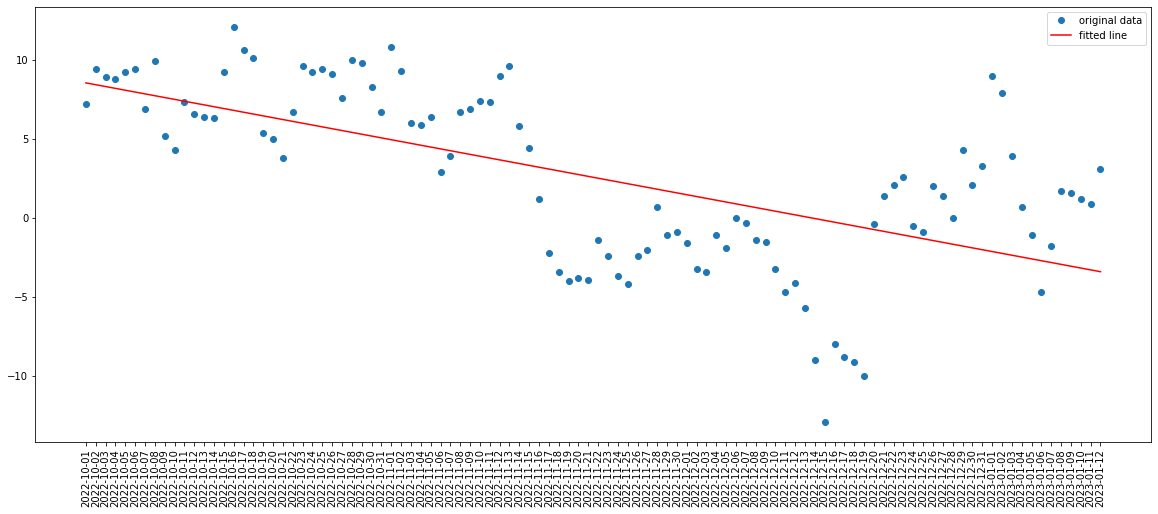

In [117]:
plt.figure(figsize=(20, 8))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, result.intercept + result.slope * x.index, 'r', label='fitted line')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Przewidziana minimalna temperatura w Olsztynie na dzień 2023-01-13

In [118]:
result.intercept + result.slope * 104

-3.5177371172516807

### Temperatura godzinowa

In [119]:
df3 = pd.read_csv('data/hourly_data.csv')
df3 = df3[df3['location'] == 'Olsztyn']
df3 = df3[['date', 'time', 'temperature']]
df3.head()

,date,time,temperature
0,2022-10-01,0,9.3
1,2022-10-01,1,9.2
2,2022-10-01,2,9.2
3,2022-10-01,3,8.9
4,2022-10-01,4,8.4


In [133]:
X = df3[['date', 'time']]
X['date_as_number'] = X['date'].str.replace('-', '').astype(int)
X = add_constant(X)
Y = df3['temperature']
Y = pd.DataFrame(Y)

In [134]:
model = OLS(Y, X[['const', 'date_as_number', 'time']]).fit()
prediction = model.predict(X[['const', 'date_as_number', 'time']])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.388
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           0.000632
Time:                        15:39:10   Log-Likelihood:                -8075.2
No. Observations:                2496   AIC:                         1.616e+04
Df Residuals:                    2493   BIC:                         1.617e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2004.6868    866.730      2.313      0.021     305.102    3704.272
date_as_number -9.893e-05   4.29e-05     -2.308      0.021      -0.000   -1.49e-05
time               0.0547      0.018      3.074      0.002       0.020       0.090
==============================================================================
Omnibus:                      300.657   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.404
Skew:                          -0.212   Prob(JB):                     1.16e-21
Kurtosis:                       2.136   Cond. No.                     1.42e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
prediction

0       4.142811
1       4.197496
2       4.252181
3       4.306865
4       4.361550
          ...   
2491    4.280435
2492    4.335119
2493    4.389804
2494    4.444489
2495    4.499174
Length: 2496, dtype: float64

In [136]:
pred_results = Y.copy()
pred_results['predicted value'] = prediction
pred_results

,temperature,predicted value
0,9.3,4.142811
1,9.2,4.197496
2,9.2,4.252181
3,8.9,4.306865
4,8.4,4.361550
...,...,...
2491,6.0,4.280435
2492,5.9,4.335119
2493,6.2,4.389804
2494,6.5,4.444489
